# 02. Preparation Statistical Data and Spatial Categories
__Capstone project: Duration of the insertion of real estate advertisements for rental apartments in Switzerland__

In [1]:
%load_ext lab_black

In [2]:
# import commands
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# I will once again import the advertisements from the file 01_Preparation_Advertisements
import pandas as pd

df = pd.read_csv(
    "Data/ads_after_eda.csv",
    delimiter=",",
    dtype={"Minergie": "str", "Rollstuhlgängig": "str"},
)  # specify the column types to avoid DtypeWarning

# shape of the data
df.shape

(921886, 21)

## Statistical data on the housing market

### The data

Next to the advertisements I use 6 statistical data sets, which might have a correlation to the duration of insertion. They are all form the Federal Statisical Office ([FSO](https://www.bfs.admin.ch/bfs/en/home.html)) and have the same range of years as my advertisement data.

* The first dataset is the population density, which includes the number of inhabitants per square kilometer of total land area. ([Link](https://www.atlas.bfs.admin.ch/maps/13/de/16217_75_3501_70/25233.html)).

* The next dataset is about the percentage of people living in single-family homes out of the total population stock. No distinction is made between rental apartments versus condominiums. ([Link](https://www.atlas.bfs.admin.ch/maps/13/de/16308_12801_175_169/25394.htm)).

* The next dataset is about the average household size in number of persons per community and year. ([Link](https://www.atlas.bfs.admin.ch/maps/13/de/16302_3046_3032_70/25379.html)).

* The 4th dataset is about the new dwellings created per 1000 inhabitants in the year in question. New dwellings created through conversions are not counted. Again, no distinction is made between rental apartments versus condominiums.([Link](https://www.atlas.bfs.admin.ch/maps/13/de/16833_173_170_169/26190.html)).

* The 5th dataset is about the proportion of 3 and 4 room apartments in total housing stock. Again, no distinction is made between rental apartments versus condominiums. ([Link](https://www.atlas.bfs.admin.ch/maps/13/de/16307_5762_175_169/25391.html)).

* The last dataset is a yearly vacancy rate for every community in Switzerland. The vacancy rate is the percentage of vacant dwellings (target date: June 1) in the total housing stock of the previous year. In the vacancy census, vacant dwellings are those that are offered on the market for permanent rent or for sale. ([Link](https://www.atlas.bfs.admin.ch/maps/13/de/11110_178_175_169/18380.html)).



__Population density__

In [4]:
# import data
pop_dens = pd.concat(
    pd.read_excel("data/Bevölkerungsdichte.xlsx", sheet_name=None), ignore_index=True
)
# show some rows
pop_dens.head(3)

,Regions-ID,Regionsname,Einwohner/innen pro km² Gesamtfläche,Jahr
0,1,Aeugst am Albis,254.614412,2020
1,2,Affoltern am Albis,1160.434372,2020
2,3,Bonstetten,755.047106,2020


__Single family homes__

In [5]:
# import data
single_fam_home = pd.concat(
    pd.read_excel("data/Bewohnerinnen in Einfamilienhäuser.xlsx", sheet_name=None),
    ignore_index=True,
)
# show some rows
single_fam_home.head(3)

,Regions-ID,Regionsname,"Anteil Bewohner/innen in Einfamilienhäusern, in %",Jahr
0,1,Aeugst am Albis,49.098880,2020
1,2,Affoltern am Albis,22.434195,2020
2,3,Bonstetten,36.260018,2020


__Household size__

In [6]:
# import data
hh_size = pd.concat(
    pd.read_excel("data/Durchschnittliche Haushaltsgrösse.xlsx", sheet_name=None),
    ignore_index=True,
)
# show some rows
hh_size.head(3)

,Regions-ID,Regionsname,"Durchschnittliche Haushaltsgrösse*, in Personen",Jahr
0,1,Aeugst am Albis,2.281642,2020
1,2,Affoltern am Albis,2.188498,2020
2,3,Bonstetten,2.368689,2020


__Newly built apartments__

In [7]:
# import data
new_apart = pd.concat(
    pd.read_excel("data/Neue Wohnungen.xlsx", sheet_name=None), ignore_index=True
)
# this column is not needed:
new_apart = new_apart.drop(["Im Gesamtjahr neu erstellte Wohnungen"], axis=1)
# show some rows
new_apart.head(3)

,Regions-ID,Regionsname,Neu erstellte Wohnungen pro 1 000 Einwohner,Jahr
0,1,Aeugst am Albis,5.047956,2020
1,2,Affoltern am Albis,4.551735,2020
2,3,Bonstetten,0.179469,2020


__Proportion of 3 and 4 room apartments__

In [8]:
# import data
rooms_3_4 = pd.concat(
    pd.read_excel("data/3-4 Zimmerwohnungen.xlsx", sheet_name=None), ignore_index=True
)
# show some rows
rooms_3_4.head(3)

,Regions-ID,Regionsname,"Anteil 3-4 Zimmer-Wohnungen, in %",Jahr
0,1,Aeugst am Albis,42.262540,2020
1,2,Affoltern am Albis,60.924297,2020
2,3,Bonstetten,55.250404,2020


__Vacancy rate__

In [9]:
# import data
vacancy_rate = pd.concat(
    pd.read_excel("data/Leerwohnungsziffer.xlsx", sheet_name=None), ignore_index=True
)
# show some rows
vacancy_rate.head(3)

,Regions-ID,Regionsname,"Anteil leer stehender Wohnungen am Gesamtwohnungsbestand, in %",Jahr
0,1,Aeugst am Albis,5.291577,2020
1,2,Affoltern am Albis,1.005548,2020
2,3,Bonstetten,1.171717,2020


### Exploratory data analysis (EDA)

In a next step, I will combine the advertisements with my statistical data. But before merging theses datasets, I will have to make sure that the municipalities are the same.

### Data coherence

In [10]:
# Number of unique municipalities in the data sets
print(
    "number of municipalities in dataset 'pop_dens':",
    pop_dens["Regionsname"].nunique(),
)
print(
    "number of municipalities in dataset 'single_fam_home':",
    single_fam_home["Regionsname"].nunique(),
)
print(
    "number of municipalities in dataset 'hh_size':",
    hh_size["Regionsname"].nunique(),
)
print(
    "number of municipalities in datset 'new_apart':",
    new_apart["Regionsname"].nunique(),
)
print(
    "number of municipalities in datset 'rooms_3_4':",
    rooms_3_4["Regionsname"].nunique(),
)
print(
    "number of municipalities in datset 'vacancy_rate':",
    vacancy_rate["Regionsname"].nunique(),
)
print(
    "number of municipalities in datset 'df':",
    df["Gemeinde"].nunique(),
)

number of municipalities in dataset 'pop_dens': 2343
number of municipalities in dataset 'single_fam_home': 2343
number of municipalities in dataset 'hh_size': 2343
number of municipalities in datset 'new_apart': 2343
number of municipalities in datset 'rooms_3_4': 2343
number of municipalities in datset 'vacancy_rate': 2342
number of municipalities in datset 'df': 2176


In [11]:
pd_unique = pop_dens["Regionsname"].unique()
sfh_unique = single_fam_home["Regionsname"].unique()
hs_unique = hh_size["Regionsname"].unique()
na_unique = new_apart["Regionsname"].unique()
r34_unique = rooms_3_4["Regionsname"].unique()
vr_unique = vacancy_rate["Regionsname"].unique()
df_unique = df["Gemeinde"].unique()

In [12]:
# Check if municipalities are the same in the data sets
print(np.array_equal(pd_unique, sfh_unique))
print(np.array_equal(pd_unique, hs_unique))
print(np.array_equal(pd_unique, na_unique))
print(np.array_equal(pd_unique, r34_unique))
print(np.array_equal(pd_unique, vr_unique))

True
True
True
True
False


There is a discrepancy in the dataframe vacancy rate. Let's see how many and which municipalities differ.

In [13]:
# Show difference between the data sets
print(
    "difference 'pop_dens' to 'vacancy_rate':",
    len(list(set(pd_unique) - set(vr_unique))),
)

difference 'pop_dens' to 'vacancy_rate': 1


In [14]:
# difference between vacancy_rate & pop_dens
list(set(vacancy_rate["Regionsname"].unique()) - set(pop_dens["Regionsname"].unique()))

[]

In [15]:
# difference between pop_dens & vacancy_rate
list(set(pop_dens["Regionsname"].unique()) - set(vacancy_rate["Regionsname"].unique()))

['Verzasca']

#### merge statistical data sets

In [16]:
# Merge DataFrames by joining them on columns, use keys from both frames
merge_1 = pd.merge(pop_dens, single_fam_home, how="outer")

merge_2 = pd.merge(
    merge_1,
    hh_size,
    how="outer",
)

merge_3 = pd.merge(
    merge_2,
    new_apart,
    how="outer",
)

merge_4 = pd.merge(
    merge_3,
    rooms_3_4,
    how="outer",
)

stats = pd.merge(
    merge_4,
    vacancy_rate,
    how="outer",
)
stats.head(2)

,Regions-ID,Regionsname,Einwohner/innen pro km² Gesamtfläche,Jahr,"Anteil Bewohner/innen in Einfamilienhäusern, in %","Durchschnittliche Haushaltsgrösse*, in Personen",Neu erstellte Wohnungen pro 1 000 Einwohner,"Anteil 3-4 Zimmer-Wohnungen, in %","Anteil leer stehender Wohnungen am Gesamtwohnungsbestand, in %"
0,1,Aeugst am Albis,254.614412,2020,49.098880,2.281642,5.047956,42.262540,5.291577
1,2,Affoltern am Albis,1160.434372,2020,22.434195,2.188498,4.551735,60.924297,1.005548


In [17]:
# Changing columns name with index number
mapping = {
    stats.columns[2]: "Population density",
    stats.columns[4]: "Proportion of single-family house residents",
    stats.columns[5]: "Average household size",
    stats.columns[6]: "Newly built apartments per 10000 inhabitants",
    stats.columns[7]: "Share of 3-4 room apartments",
    stats.columns[8]: "Vacancy rate",
}
stats.rename(columns=mapping, inplace=True)

In [18]:
# show missing values per columns
stats.isnull().sum()

Regions-ID                                      0
Regionsname                                     0
Population density                              8
Jahr                                            0
Proportion of single-family house residents     8
Average household size                          8
Newly built apartments per 10000 inhabitants    8
Share of 3-4 room apartments                    8
Vacancy rate                                    2
dtype: int64

In [19]:
# show rows with missing values
stats[stats.isna().any(axis=1)]

,Regions-ID,Regionsname,Population density,Jahr,Proportion of single-family house residents,Average household size,Newly built apartments per 10000 inhabitants,Share of 3-4 room apartments,Vacancy rate
1633,5399,Verzasca,3.656751,2020,70.337922,1.930693,1.562500,57.916452,NaN
10815,5806,Jorat-Mézières,254.061372,2016,42.105263,2.458699,5.436752,49.406176,NaN
13483,5095,Brione (Verzasca),NaN,2020,NaN,NaN,NaN,NaN,0.892857
13484,5102,Corippo,NaN,2020,NaN,NaN,NaN,NaN,0.000000
13485,5105,Frasco,NaN,2020,NaN,NaN,NaN,NaN,0.357143
13486,5129,Sonogno,NaN,2020,NaN,NaN,NaN,NaN,1.015228
13487,5135,Vogorno,NaN,2020,NaN,NaN,NaN,NaN,0.980392
13488,5782,Carrouge (VD),NaN,2016,NaN,NaN,NaN,NaN,1.574803
13489,5789,Ferlens (VD),NaN,2016,NaN,NaN,NaN,NaN,1.973684
13490,5791,Mézières (VD),NaN,2016,NaN,NaN,NaN,NaN,3.275862


##### fix data deviation in statistical data itself

Theses municipalities are merged together to the new municipality "Verzasca": "Frasco", "Brione (Verzasca)", "Corippo", "Sonogno", "Vogorno". I will fill the NaN value at index 1633 with the mean of the rows 13483:13487 and then drop those rows.

In [20]:
mean_value_1 = stats[13483:13487]["Vacancy rate"].mean()
mean_value_1

0.5663071066

In [21]:
stats.at[1633, "Vacancy rate"] = mean_value_1
stats.iloc[[1633]]

,Regions-ID,Regionsname,Population density,Jahr,Proportion of single-family house residents,Average household size,Newly built apartments per 10000 inhabitants,Share of 3-4 room apartments,Vacancy rate
1633,5399,Verzasca,3.656751,2020,70.337922,1.930693,1.5625,57.916452,0.566307


The same procedure applies to these municipalities: "Carrouge (VD)"", "Ferlens (VD)", "Mézières (VD)", they will be merged to "Jorat-Mézières".

In [22]:
mean_value_2 = stats[13488:13490]["Vacancy rate"].mean()
mean_value_2

1.77424368005

In [23]:
stats.at[10815, "Vacancy rate"] = mean_value_2
stats.iloc[[10815]]

,Regions-ID,Regionsname,Population density,Jahr,Proportion of single-family house residents,Average household size,Newly built apartments per 10000 inhabitants,Share of 3-4 room apartments,Vacancy rate
10815,5806,Jorat-Mézières,254.061372,2016,42.105263,2.458699,5.436752,49.406176,1.774244


In [24]:
stats.drop([13483, 13484, 13485, 13486, 13487, 13488, 13489, 13490], inplace=True)
stats.shape

(13483, 9)

##### fix data deviation to df

According to the document "Official Municipal Directory of Switzerland - Announced changes 2020" ([Link](https://www.bfs.admin.ch/bfsstatic/dam/assets/13127890/master)) there were several mergers of municipalities and name changes. This is why the municipalities are not the same in the documents. I will merge the municipalities where necessary and change the names to create  coherent datasets. To check the correct municipality names and merges, visit: https://www.agvchapp.bfs.admin.ch/de/communes/query

In [25]:
# Show difference between the data sets
print(
    "difference 'df' to 'stats':",
    len(list(set(df["Gemeinde"].unique()) - set(stats["Regionsname"].unique()))),
)

difference 'df' to 'stats': 1


In [26]:
# difference between df & vacancy_rate
list(set(df["Gemeinde"].unique()) - set(stats["Regionsname"].unique()))

['La Grande-Béroche']

In [27]:
# Correct misspelling
df["Gemeinde"] = df["Gemeinde"].str.replace("La Grande-Béroche", "La Grande Béroche")
stats["Regionsname"] = stats["Regionsname"].str.replace(
    "La Grande-Béroche", "La Grande Béroche"
)

In [28]:
# Show difference between the data sets
print(
    "difference 'stats' to 'df':",
    len(list(set(stats["Regionsname"].unique()) - set(df["Gemeinde"].unique()))),
)

difference 'stats' to 'df': 167


In [29]:
# difference between df & vacancy_rate
list(set(stats["Regionsname"].unique()) - set(df["Gemeinde"].unique()))

['Rebévelier',
 'Oberschrot',
 'Randogne',
 'Mühlethurnen',
 'Vuisternens-en-Ogoz',
 'Haut-Vully',
 'Saxeten',
 'Schwendibach',
 'Campo (Vallemaggia)',
 'Claro',
 'Splügen',
 'Brenles',
 'Waltensburg/Vuorz',
 'Autafond',
 'Damphreux',
 'Gresso',
 'Maladers',
 'Ebersecken',
 'Scherz',
 'Mollens (VS)',
 'Rebeuvelier',
 'Simplon',
 'Le Glèbe',
 'Salvenach',
 'Pianezzo',
 'Cheyres',
 'Noréaz',
 'Villeneuve (FR)',
 'Lohn (GR)',
 'Bussy (FR)',
 'Wallenried',
 'Camorino',
 'St. Antönien',
 'Vergeletto',
 'Tinizong-Rona',
 'Niederösch',
 'Gnosca',
 'Bivio',
 'Savognin',
 'Linescio',
 'Waltalingen',
 'Estavayer-le-Lac',
 'Montalchez',
 'Giubiasco',
 'Lohnstorf',
 'Mosogno',
 'Iragna',
 'Mulegns',
 'Moleno',
 'Tägertschi',
 'Osogna',
 'Gorgier',
 'Champoz',
 'Isenthal',
 'Bevaix',
 'Russy',
 'Kirchenthurnen',
 'Mundaun',
 'Verdabbio',
 'Ferlens (VD)',
 'Carrouge (VD)',
 'Mutten',
 'Wolfisberg',
 'Binn',
 'Attelwil',
 'Lurtigen',
 'Corserey',
 'Ferrera',
 'Leggia',
 'Sur',
 'Marmorera',
 'Hinterr

__merging of municipalities__

In [30]:
# Rochefort
stats["Regionsname"] = stats["Regionsname"].replace("Brot-Dessous", "Rochefort")
# Faido
stats["Regionsname"] = stats["Regionsname"].replace("Sobrio", "Faido")
# Haute-Ajoie
stats["Regionsname"] = stats["Regionsname"].replace("Rocourt", "Haute-Ajoie")
# Klosters-Serneus
stats["Regionsname"] = stats["Regionsname"].replace("Saas", "Klosters-Serneus")
# Belfaux
stats["Regionsname"] = stats["Regionsname"].replace("Autafond", "Belfaux")
# Horgen
stats["Regionsname"] = stats["Regionsname"].replace("Hirzel", "Horgen")
# Illnau-Effretikon
stats["Regionsname"] = stats["Regionsname"].replace("Kyburg", "Illnau-Effretikon")
# Luzein
stats["Regionsname"] = stats["Regionsname"].replace("St. Antönien", "Luzein")
# Elgg
stats["Regionsname"] = stats["Regionsname"].replace("Hofstetten (ZH)", "Elgg")
# Lupfig
stats["Regionsname"] = stats["Regionsname"].replace("Scherz", "Lupfig")
# Rapperswil (BE)
stats["Regionsname"] = stats["Regionsname"].replace("Bangerten", "Rapperswil (BE)")
# Grosshöchstetten
stats["Regionsname"] = stats["Regionsname"].replace("Schlosswil", "Grosshöchstetten")
# Altishofen
stats["Regionsname"] = stats["Regionsname"].replace("Ebersecken", "Altishofen")
# Reitnau
stats["Regionsname"] = stats["Regionsname"].replace("Attelwil", "Reitnau")
# Münsingen
stats["Regionsname"] = stats["Regionsname"].replace("Tägertschi", "Münsingen")
# Val Terbi
stats["Regionsname"] = stats["Regionsname"].replace("Corban", "Val Terbi")
# Sion
stats["Regionsname"] = stats["Regionsname"].replace("Les Agettes", "Sion")
# Niederbipp
stats["Regionsname"] = stats["Regionsname"].replace("Wolfisberg", "Niederbipp")
# Surpierre
stats["Regionsname"] = stats["Regionsname"].replace("Villeneuve (FR)", "Surpierre")
# Corminboeuf
stats["Regionsname"] = stats["Regionsname"].replace("Chésopelloz", "Corminboeuf")
# Kallnach
stats["Regionsname"] = stats["Regionsname"].replace("Golaten", "Kallnach")
# Chur
stats["Regionsname"] = stats["Regionsname"].replace("Maladers", "Chur")
# Steffisburg
stats["Regionsname"] = stats["Regionsname"].replace("Schwendibach", "Steffisburg")
# Seeberg
stats["Regionsname"] = stats["Regionsname"].replace("Hermiswil", "Seeberg")
# Brugg
stats["Regionsname"] = stats["Regionsname"].replace("Schinznach-Bad", "Brugg")
# Thusis
stats["Regionsname"] = stats["Regionsname"].replace("Mutten", "Thusis")


# Cheyres-Châbles
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["Châbles", "Cheyres"],
            ["Cheyres-Châbles"] * 2,
        )
    )
)
# Bergün Filisur
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["Filisur", "Bergün/Bravuogn"],
            ["Bergün Filisur"] * 2,
        )
    )
)
# Courtepin
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["Villarepos", "Barberêche", "Wallenried"],
            ["Courtepin"] * 3,
        )
    )
)
# Bellinzona
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            [
                "Camorino",
                "Gudo",
                "Gnosca",
                "Gorduno",
                "Giubiasco",
                "Monte Carasso",
                "Moleno",
                "Sementina",
                "Sant'Antonio",
                "Preonzo",
                "Pianezzo",
                "Claro",
            ],
            ["Bellinzona"] * 12,
        )
    )
)
# Thurnen
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["Mühlethurnen", "Lohnstorf", "Kirchenthurnen"],
            ["Thurnen"] * 3,
        )
    )
)
# Onsernone
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["Vergeletto", "Gresso", "Mosogno", "Isorno"],
            ["Onsernone"] * 4,
        )
    )
)
# Goms
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            [
                "Blitzingen",
                "Niederwald",
                "Grafschaft",
                "Münster-Geschinen",
                "Reckingen-Gluringen",
            ],
            ["Goms"] * 5,
        )
    )
)
# Riviera
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["Osogna", "Lodrino", "Iragna", "Cresciano"],
            ["Riviera"] * 4,
        )
    )
)
# Gibloux
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            [
                "Le Glèbe",
                "Corpataux-Magnedens",
                "Farvagny",
                "Rossens (FR)",
                "Vuisternens-en-Ogoz",
            ],
            ["Gibloux"] * 5,
        )
    )
)
# Murten
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["Courlevon", "Salvenach", "Lurtigen", "Jeuss"],
            ["Murten"] * 4,
        )
    )
)
# Stammheim
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["Oberstammheim", "Unterstammheim", "Waltalingen"],
            ["Stammheim"] * 3,
        )
    )
)
# Breil/Brigels
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["Waltensburg/Vuorz", "Andiast"],
            ["Breil/Brigels"] * 2,
        )
    )
)
# Estavayer
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            [
                "Estavayer-le-Lac",
                "Vernay",
                "Murist",
                "Rueyres-les-Prés",
                "Morens (FR)",
                "Bussy (FR)",
                "Vuissens",
            ],
            ["Estavayer"] * 7,
        )
    )
)
# Surses
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            [
                "Tinizong-Rona",
                "Sur",
                "Savognin",
                "Salouf",
                "Riom-Parsonz",
                "Mulegns",
                "Marmorera",
                "Cunter",
                "Bivio",
            ],
            ["Surses"] * 9,
        )
    )
)
# Crans-Montana
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["Randogne", "Mollens (VS)", "Montana", "Chermignon"],
            ["Crans-Montana"] * 4,
        )
    )
)
# La Grande-Béroche
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            [
                "Vaumarcus",
                "Saint-Aubin-Sauges",
                "Montalchez",
                "Gorgier",
                "Fresens",
                "Bevaix",
            ],
            ["La Grande Béroche"] * 6,
        )
    )
)
# Lucens
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            [
                "Cremin",
                "Chesalles-sur-Moudon",
                "Brenles",
                "Forel-sur-Lucens",
                "Sarzens",
            ],
            ["Lucens"] * 5,
        )
    )
)
# Rheinwald
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["Splügen", "Nufenen", "Hinterrhein"],
            ["Rheinwald"] * 3,
        )
    )
)
# Belmont-Broye
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["Dompierre (FR)", "Domdidier", "Russy", "Léchelles"],
            ["Belmont-Broye"] * 4,
        )
    )
)
# Chavornay
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["Corcelles-sur-Chavornay", "Essert-Pittet"],
            ["Chavornay"] * 2,
        )
    )
)
# Plaffeien
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["Oberschrot", "Zumholz"],
            ["Plaffeien"] * 2,
        )
    )
)
# Courrendlin
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["Vellerat", "Rebeuvelier", "Courrendlin"],
            ["Courrendlin"] * 3,
        )
    )
)
# Mont-Vully
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["Bas-Vully", "Haut-Vully"],
            ["Mont-Vully"] * 2,
        )
    )
)
# Muntogna da Schons
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["Donat", "Mathon", "Lohn (GR)", "Casti-Wergenstein"],
            ["Muntogna da Schons"] * 4,
        )
    )
)
# Muntogna da Schons
df["Gemeinde"] = df["Gemeinde"].replace(
    dict(
        zip(
            ["Donat", "Mathon", "Lohn (GR)", "Casti-Wergenstein"],
            ["Muntogna da Schons"] * 4,
        )
    )
)
# Grono
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["Verdabbio", "Leggia", "Grono"],
            ["Grono"] * 3,
        )
    )
)
# Wädenswil
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["Schönenberg (ZH)", "Hütten"],
            ["Wädenswil"] * 2,
        )
    )
)
# Ersigen
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["Oberösch", "Niederösch"],
            ["Ersigen"] * 2,
        )
    )
)
# Obersaxen Mundaun
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["Mundaun", "Obersaxen"],
            ["Obersaxen Mundaun"] * 2,
        )
    )
)
# Villaz
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["La Folliaz", "Villaz-Saint-Pierre"],
            ["Villaz"] * 2,
        )
    )
)
# Murten
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["Galmiz", "Gempenach", "Clavaleyres"],
            ["Murten"] * 3,
        )
    )
)
# Murten
df["Gemeinde"] = df["Gemeinde"].replace(
    dict(
        zip(
            ["Galmiz", "Gempenach", "Clavaleyres"],
            ["Murten"] * 3,
        )
    )
)
# Jorat-Mézières
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["Ferlens (VD)", "Mézières (VD)", "Carrouge (VD)"],
            ["Jorat-Mézières"] * 3,
        )
    )
)
# Prez
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["Prez-vers-Noréaz", "Noréaz", "Corserey"],
            ["Prez"] * 3,
        )
    )
)
# Kirchdorf (BE)
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["Noflen", "Mühledorf (BE)", "Gelterfingen"],
            ["Kirchdorf (BE)"] * 3,
        )
    )
)
# Verzasca
stats["Regionsname"] = stats["Regionsname"].replace(
    dict(
        zip(
            ["Frasco", "Brione (Verzasca)", "Corippo", "Sonogno", "Vogorno"],
            ["Verzasca"] * 5,
        )
    )
)
# Verzasca
df["Gemeinde"] = df["Gemeinde"].replace(
    dict(
        zip(
            ["Frasco", "Brione (Verzasca)", "Corippo", "Sonogno", "Vogorno"],
            ["Verzasca"] * 5,
        )
    )
)

In [31]:
# recalculate stats
stats = stats.groupby(["Regionsname", "Jahr"], sort=False, as_index=False).agg(
    {
        "Population density": "mean",
        "Proportion of single-family house residents": "mean",
        "Average household size": "mean",
        "Newly built apartments per 10000 inhabitants": "mean",
        "Share of 3-4 room apartments": "mean",
        "Vacancy rate": "mean",
    }
)

In [32]:
# difference between df & stats
list(set(df["Gemeinde"].unique()) - set(stats["Regionsname"].unique()))

[]

In [33]:
# Show difference between stats & df
print(
    "difference 'stats' to 'df':",
    len(list(set(stats["Regionsname"].unique()) - set(df["Gemeinde"].unique()))),
)

difference 'stats' to 'df': 24


In [34]:
# list of municipalities not present in df
# These are mostly very small rural municipalities with less than 200 inhabitants, which is why there aren't any advertisements
list(set(stats["Regionsname"].unique()) - set(df["Gemeinde"].unique()))

['Rebévelier',
 'Linescio',
 'Bosco/Gurin',
 'Saxeten',
 'Zwischbergen',
 'Campo (Vallemaggia)',
 'Sufers',
 'Bedretto',
 'Eisten',
 'Embd',
 'Damphreux',
 'Champoz',
 'Isenthal',
 'Oberems',
 'Seehof',
 'Simplon',
 'Binn',
 'Ferrera',
 'Dalpe',
 'Le Bémont (JU)',
 'Kammersrohr',
 'Personico',
 'Cerentino',
 'Bister']

#### Merge statistical data and df

In [35]:
# Merge DataFrames by joining them on columns, use only keys from left frame
df_new = pd.merge(
    df,
    stats,
    how="left",
    left_on=["Gemeinde", "Jahr_Erste_Publikation"],
    right_on=["Regionsname", "Jahr"],
)

In [36]:
df_new.isnull().sum()

Gemeinde                                        0
Anzahl Zimmer                                   0
Breitengrad                                     0
Insertionsdauer                                 0
Längengrad                                      0
Nettomiete pro m2 und Jahr                      0
Nettomiete pro Monat                            0
Wohnfläche                                      0
Nutzung                                         0
Zustand                                         0
Aussicht                                        0
Balkon                                          0
Bauperiode                                      0
Minergie                                        0
Nutzung detailliert                             0
Parkplatz aussen                                0
Parkplatz innen                                 0
Rollstuhlgängig                                 0
Verfügbarkeitskategorie                         0
Jahr_Erste_Publikation                          0


In [37]:
# drop the column "year", it is not needed
df = df_new.drop(["Jahr", "Regionsname"], axis=1)

In [38]:
# show data
df[
    [
        "Gemeinde",
        "Jahr_Erste_Publikation",
        "Population density",
        "Proportion of single-family house residents",
        "Average household size",
        "Newly built apartments per 10000 inhabitants",
        "Share of 3-4 room apartments",
        "Vacancy rate",
    ]
].tail()

,Gemeinde,Jahr_Erste_Publikation,Population density,Proportion of single-family house residents,Average household size,Newly built apartments per 10000 inhabitants,Share of 3-4 room apartments,Vacancy rate
921881,St. Margrethen,2016,850.218341,31.589709,2.347755,0.172652,58.307100,4.172560
921882,St. Margrethen,2016,850.218341,31.589709,2.347755,0.172652,58.307100,4.172560
921883,Stans,2015,747.021661,12.613663,2.340876,2.295518,60.439845,0.701663
921884,Wängi,2015,278.758369,57.268817,2.488141,13.755459,42.623788,1.319958
921885,Grosshöchstetten,2015,597.668705,31.354411,2.266845,0.711035,50.566159,2.032627


In [39]:
df.shape

(921886, 27)

#### Log-transformation of statistical data

In [40]:
# define the new features added
df_stats = [
    "Population density",
    "Proportion of single-family house residents",
    "Average household size",
    "Newly built apartments per 10000 inhabitants",
    "Share of 3-4 room apartments",
    "Vacancy rate",
]

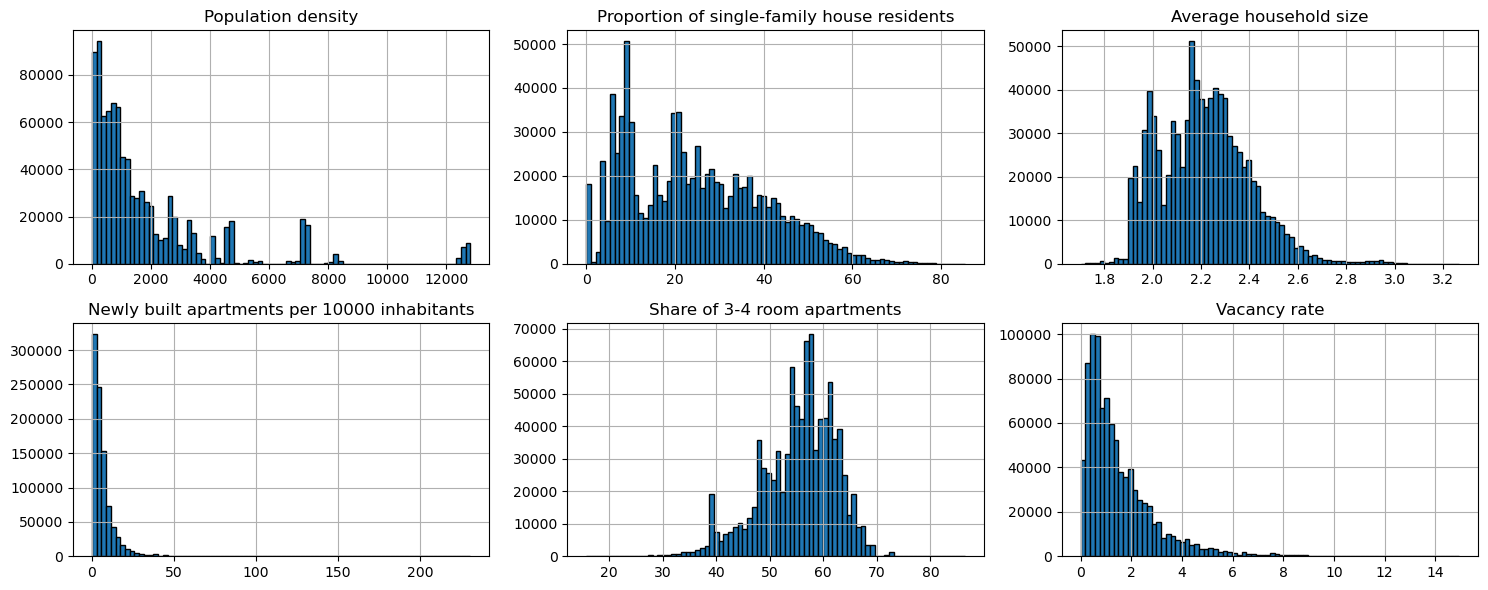

In [41]:
# Plots the histogram for each numerical feature in a separate subplot
df[df_stats].hist(bins=80, figsize=(15, 6), layout=(-1, 3), edgecolor="black")
plt.tight_layout()
plt.show()

In [42]:
df[df_stats].skew()

Population density                              2.604174
Proportion of single-family house residents     0.489523
Average household size                          0.557683
Newly built apartments per 10000 inhabitants    4.885413
Share of 3-4 room apartments                   -0.677914
Vacancy rate                                    2.369044
dtype: float64

I will have to log-transform the features ``newly built apartments``, ``Population density``and ``Vacancy rate``as they are a clearly left skewed.

In [43]:
df_skewed = [
    "Newly built apartments per 10000 inhabitants",
    "Vacancy rate",
    "Population density",
]

In [44]:
# performing logarithmic transformation by applying log(x+1) element-wise to a subset of columns
# by performing x+1 I will add a constant value to each value of variable and therefore avoiding zero-values
df[df_skewed] = df[df_skewed].applymap(lambda x: np.log(x + 1))

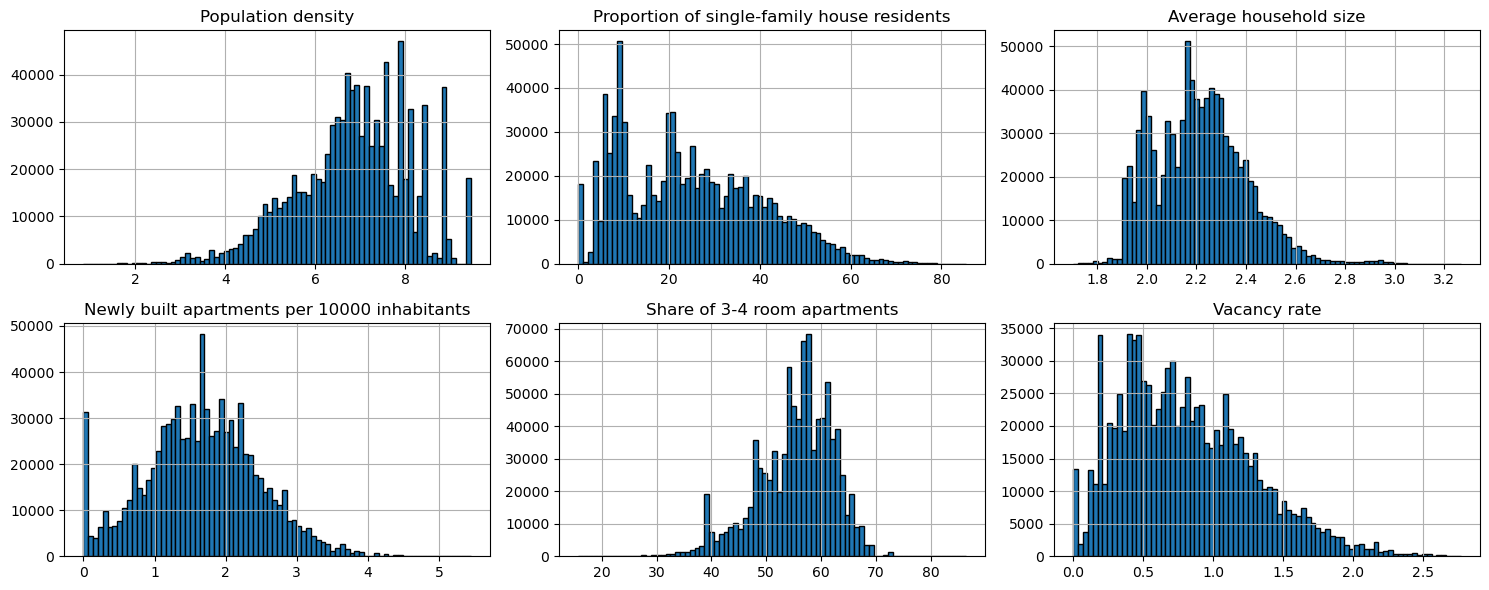

In [45]:
# Plots the histogram for each numerical feature in a separate subplot
df[df_stats].hist(bins=80, figsize=(15, 6), layout=(-1, 3), edgecolor="black")
plt.tight_layout()
plt.show()

## Spatial categories for the municipalities

The municipality has a very large influence on the insertion period. But since I cannot include 2,000+ municipalities in my machine learning model, I have to aggregate the municipalities. I will do so in the next steps with the help of the spatial categories.

### The data

My thrid data source is also from the Federal Statistical Office. It contains municipal typology for the over 2'000 municipalities in Switzerland. According to the FSO ([Link](https://www.atlas.bfs.admin.ch/maps/13/map/mapIdOnly/20593_de.html)): "The definition of the Municipality Typology 2012 follows a three-stage decision tree. First, the municipalities of Switzerland are assigned to one of three categories according to the definition "Spatial with Urban Character 2012". These in turn are subdivided into 9 and further into 25 categories, resulting in the two levels of the community typology. While the differentiation of the 9 categories is based on density, size and accessibility criteria, socioeconomic criteria are used for the finer division into 25 categories." 

In [46]:
# import data
spatial_cat = pd.read_csv("data/Raumgliederungen.csv", delimiter=";")

In [47]:
# column names, count and type
display(spatial_cat.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gmd Nr         2145 non-null   int64 
 1   Gmd            2145 non-null   object
 2   Kanton Nr      2145 non-null   int64 
 3   Kanton         2145 non-null   object
 4   Bezirk Nr      2145 non-null   int64 
 5   Bezirksname    2145 non-null   object
 6   3 Gmd Kat Nr   2145 non-null   int64 
 7   3 Gmd Kat      2145 non-null   object
 8   9 Gmd Kat Nr   2145 non-null   int64 
 9   9 Gmd Kat      2145 non-null   object
 10  25 Gmd Kat Nr  2145 non-null   int64 
 11  25 Gmd Kat     2145 non-null   object
dtypes: int64(6), object(6)
memory usage: 201.2+ KB


None

* ``Gmd Nr``: identification number of municipality
* ``Gmd``: name of municipality
* ``Kanton Nr``: identification number of canton
* ``Kanton``: name of canton
* ``Bezirk Nr``: identification number of district
* ``Bezirksname``: name of district
* ``3 Gmd Kat Nr``: identification number of the 3 categories
* ``3 Gmd Kat``: name of the 3 categories
* ``9 Gmd Kat Nr``: identification number of the 9 categories
* ``9 Gmd Kat``: name of the 9 categories
* ``25 Gmd Kat Nr``: identification number of the 25 categories
* ``25 Gmd Kat``: name of the 25 categories

In [48]:
# I will drop the features not needed.
spatial_cat.drop(
    columns=[
        "Gmd Nr",
        "Kanton Nr",
        "Bezirk Nr",
        "Bezirksname",
        "3 Gmd Kat Nr",
        "9 Gmd Kat Nr",
        "25 Gmd Kat Nr",
    ],
    inplace=True,
)

In [49]:
# show data
spatial_cat.head(5)

,Gmd,Kanton,3 Gmd Kat,9 Gmd Kat,25 Gmd Kat
0,Aeugst am Albis,ZH,Ländlich,Periurbane Gemeinde geringer Dichte,Periurbane Dienstleistungsgemeinde geringer Di...
1,Affoltern am Albis,ZH,Städtisch,Städtische Gemeinde einer grossen Agglomeration,Städtische Arbeitsplatzgemeinde einer grossen ...
2,Bonstetten,ZH,Intermediär (dichter periurbaner Raum und länd...,Periurbane Gemeinde mittlerer Dichte,Periurbane Dienstleistungsgemeinde mittlerer D...
3,Hausen am Albis,ZH,Intermediär (dichter periurbaner Raum und länd...,Periurbane Gemeinde mittlerer Dichte,Periurbane Dienstleistungsgemeinde mittlerer D...
4,Hedingen,ZH,Städtisch,Städtische Gemeinde einer grossen Agglomeration,Städtische Wohngemeinde einer grossen Agglomer...


### Exploratory data analysis (EDA)

### Data coherence

In a next step, I will combine the advertisements incl. the statistical data with my spatial categories. But before merging theses datasets, I will once again have to make sure that the municipalities are the same.

In [50]:
sc_unique = spatial_cat["Gmd"].unique()
df_unique = df["Gemeinde"].unique()

In [51]:
# check if the municipality names match between the two datasets.
print(
    "difference 'df' to 'spatial categories':",
    len(list(set(df_unique) - set(sc_unique))),
)

print(
    "difference 'spatial categories' to 'df':",
    len(list(set(sc_unique) - set(df_unique))),
)

difference 'df' to 'spatial categories': 61
difference 'spatial categories' to 'df': 38


In [52]:
# difference between spatial_cat & df
list(set(spatial_cat["Gmd"].unique()) - set(df["Gemeinde"].unique()))

['Rebévelier',
 'Crans (VD)',
 "Bois-d'Amont",
 'Linescio',
 'Noble-Contrée',
 'Bosco/Gurin',
 'Saxeten',
 'Zwischbergen',
 'Campo (Vallemaggia)',
 'Val Mara',
 'Sufers',
 'Bedretto',
 'Eisten',
 'Blonay - Saint-Légier',
 'Embd',
 'Damphreux',
 'Welschenrohr-Gänsbrunnen',
 'Champoz',
 'Isenthal',
 'La Punt Chamues-ch',
 'Böztal',
 'Val de Bagnes',
 'Hautemorges',
 'Oberems',
 'Seehof',
 'Simplon',
 'Binn',
 'Ferrera',
 'Tresa',
 'Dalpe',
 'Le Bémont (JU)',
 'Klosters',
 'Personico',
 'Kammersrohr',
 'Schwende-Rüte',
 'Zurzach',
 'Cerentino',
 'Bister']

In [53]:
# difference between spatial_cat & df
list(set(df["Gemeinde"].unique()) - set(spatial_cat["Gmd"].unique()))

['Corcelles-Cormondrèche',
 'Bad Zurzach',
 'La Punt-Chamues-ch',
 'Rüte',
 'Reverolle',
 'Mötschwil',
 'Blonay',
 'Peseux',
 'Rovio',
 'Croglio',
 'Cottens (VD)',
 'Bioley-Orjulaz',
 'St. Antoni',
 'Hornussen',
 'Ponte Tresa',
 'Ependes (FR)',
 'Senèdes',
 'Maroggia',
 'Saint-Légier-La Chiésaz',
 'Bussy-Chardonney',
 'Rümligen',
 'Charrat',
 'Klosters-Serneus',
 'Alterswil',
 'Vollèges',
 'Welschenrohr',
 'Gänsbrunnen',
 'Venthône',
 'Baldingen',
 'Melano',
 'Rietheim',
 'Schwende',
 'Pampigny',
 'Les Brenets',
 'Arconciel',
 'Effingen',
 'Sessa',
 'Valangin',
 'Haldenstein',
 'Monteggio',
 'Obersteckholz',
 'Bözen',
 'Montherod',
 'Kaiserstuhl',
 'Bagnes',
 'Rekingen (AG)',
 'Rümikon',
 'Crans-près-Céligny',
 'Elfingen',
 'Veyras',
 'Apples',
 'Böbikon',
 'Wislikofen',
 'Sévery',
 'Altwis',
 'Rohr (SO)',
 'Bauen',
 'Gettnau',
 'Essertes',
 'Miège',
 'Cheiry']

I will once again correct the missmatches.

In [54]:
# La Punt Chamues-ch
df["Gemeinde"] = df["Gemeinde"].str.replace("La Punt-Chamues-ch", "La Punt Chamues-ch")
# Crans (VD)
df["Gemeinde"] = df["Gemeinde"].str.replace("Crans-près-Céligny", "Crans (VD)")
# Oron
df["Gemeinde"] = df["Gemeinde"].str.replace("Essertes", "Oron")
# Assens
df["Gemeinde"] = df["Gemeinde"].str.replace("Bioley-Orjulaz", "Assens")
# Klosters
df["Gemeinde"] = df["Gemeinde"].str.replace("Klosters-Serneus", "Klosters")
# Le Locle
df["Gemeinde"] = df["Gemeinde"].str.replace("Les Brenets", "Le Locle")
# Surpierre
df["Gemeinde"] = df["Gemeinde"].str.replace("Cheiry", "Surpierre")
# Stüsslingen
df[df["Gemeinde"] == "Rohr (SO)"] = df[df["Gemeinde"] == "Rohr (SO)"].replace(
    "Rohr (SO)", "Stüsslingen"
)  # special case
# Chur
df["Gemeinde"] = df["Gemeinde"].str.replace("Haldenstein", "Chur")
# Riggisberg
df["Gemeinde"] = df["Gemeinde"].str.replace("Rümligen", "Riggisberg")
# Aubonne
df["Gemeinde"] = df["Gemeinde"].str.replace("Montherod", "Aubonne")
# Seedorf (UR)
df["Gemeinde"] = df["Gemeinde"].str.replace("Bauen", "Seedorf (UR)")
# Hindelbank
df["Gemeinde"] = df["Gemeinde"].str.replace("Mötschwil", "Hindelbank")
# Willisau
df["Gemeinde"] = df["Gemeinde"].str.replace("Gettnau", "Willisau")
# Hitzkirch
df["Gemeinde"] = df["Gemeinde"].str.replace("Altwis", "Hitzkirch")
# Martigny
df["Gemeinde"] = df["Gemeinde"].str.replace("Charrat", "Martigny")
# Langenthal
df["Gemeinde"] = df["Gemeinde"].str.replace("Obersteckholz", "Langenthal")

# 	Neuchâtel
df["Gemeinde"] = df["Gemeinde"].replace(
    dict(zip(["Corcelles-Cormondrèche", "Peseux", "Valangin"], ["Neuchâtel"] * 3)),
)
# Tafers
df["Gemeinde"] = df["Gemeinde"].replace(
    dict(zip(["St. Antoni", "Alterswil"], ["Tafers"] * 2)),
)
# Hautemorges
df["Gemeinde"] = df["Gemeinde"].replace(
    dict(
        zip(
            [
                "Bussy-Chardonney",
                "Pampigny",
                "Sévery",
                "Reverolle",
                "Apples",
                "Cottens (VD)",
            ],
            ["Hautemorges"] * 6,
        )
    ),
)
# Blonay
df["Gemeinde"] = df["Gemeinde"].replace(
    dict(zip(["Saint-Légier-La Chiésaz", "Blonay"], ["Blonay - Saint-Légier"] * 2)),
)
# Böztal
df["Gemeinde"] = df["Gemeinde"].replace(
    dict(
        zip(
            [
                "Hornussen",
                "Bözen",
                "Effingen",
                "Elfingen",
            ],
            ["Böztal"] * 4,
        )
    ),
)
# Zurzach
df["Gemeinde"] = df["Gemeinde"].replace(
    dict(
        zip(
            [
                "Wislikofen",
                "Baldingen",
                "Böbikon",
                "Kaiserstuhl",
                "Rümikon",
                "Rietheim",
                "Rekingen (AG)",
                "Bad Zurzach",
                "Zurzach",
            ],
            ["Zurzach"] * 9,
        )
    ),
)
# Val Mara
df["Gemeinde"] = df["Gemeinde"].replace(
    dict(
        zip(
            ["Melano", "Maroggia", "Rovio"],
            ["Val Mara"] * 3,
        )
    ),
)
# Schwende-Rüte
df["Gemeinde"] = df["Gemeinde"].replace(
    dict(
        zip(
            ["Rüte", "Schwende"],
            ["Schwende-Rüte"] * 2,
        )
    ),
)
# Vald de Bagnes
df["Gemeinde"] = df["Gemeinde"].replace(
    dict(zip(["Bagnes", "Vollèges", "Monteggio"], ["Val de Bagnes"] * 3)),
)
# Tresa
df["Gemeinde"] = df["Gemeinde"].replace(
    dict(zip(["Sessa", "Croglio", "Monteggio", "Ponte Tresa"], ["Tresa"] * 4)),
)
# Welschenrohr-Gänsbrunnen
df["Gemeinde"] = df["Gemeinde"].replace(
    dict(zip(["Gänsbrunnen", "Welschenrohr"], ["Welschenrohr-Gänsbrunnen"] * 2)),
)
# Bois-d'Amont
df["Gemeinde"] = df["Gemeinde"].replace(
    dict(zip(["Arconciel", "Ependes (FR)", "Senèdes"], ["Bois-d'Amont"] * 3)),
)
# Noble-Contrée
df["Gemeinde"] = df["Gemeinde"].replace(
    dict(zip(["Miège", "Venthône", "Veyras"], ["Noble-Contrée"] * 3)),
)

### Merge data

In [55]:
# Merge DataFrames
df = pd.merge(
    df,
    spatial_cat,
    how="left",
    left_on=["Gemeinde"],
    right_on=[
        "Gmd",
    ],
)

In [56]:
# drop the column "Gmd", it is not needed
df.drop(["Gmd"], axis=1, inplace=True)

In [57]:
df.shape

(921886, 31)

## Export

In [58]:
# export to csv
from pathlib import Path

filepath = Path("Data/ads&stats_after_eda.csv")
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath, index=False)